---
## <center>**Table of Contents**<center>
* [1. Installing Libraries](#c1)
* [2. Data Preparation](#c2)
* [3. Data Preprocessing](#c3)
    * [3.1. Duplicate removing](#c31)
    * [3.2. Null cleaning](#c32)
    * [3.3. Logic checking](#c33)
    * [3.4. Outliers removing](#c34)
    * [3.5. Data type Tuning](#c35)

### **1. Installing Libraries** <a id="c1"></a>

In [78]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go, plotly.express as px
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score
from collections import Counter

In [79]:
# Ignoring warnings for cleaner output logs
import warnings
warnings.filterwarnings('ignore')

### **2. Data Preparation** <a id="c2"></a>

#### ***Import dataset by default Google Drive URL*** 

In [80]:
# Original dataset URL provided by DAZONE host
url = 'https://drive.google.com/file/d/1_y7RCkkWUiCRRCGmAPzlX8-7QDmIx5Uy/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [81]:
# Read file from path
raw_df = pd.read_csv(path)

#### ***Raw dataset statistics***

In [82]:
raw_df.tail()

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
3064,2801,1990.0,Basic,20425.0,29-10-2021,5.0,5.0,14.0,5.0,3.0,...,0.0,0.0,Other,8.414996e+10,NaN,2021.0,10.0,7.0,Married_1,Online
3065,8551,1990.0,PhD,65295.0,23-12-2022,19.0,366.0,34.0,117.0,34.0,...,0.0,0.0,Female,NaN,8.409877e+10,2022.0,12.0,20.0,Single_0,Cash
3066,7831,1998.0,Graduation,31632.0,14-07-2022,92.0,18.0,10.0,12.0,11.0,...,0.0,0.0,Female,8.431896e+10,NaN,2022.0,7.0,6.0,Single_0,NaN
3067,6426,1994.0,Master,61794.0,14-09-2022,74.0,265.0,49.0,188.0,54.0,...,0.0,0.0,Male,8.452917e+10,NaN,2022.0,NaN,20.0,Married_1,Mobile
3068,4950,1983.0,NaN,75437.0,09-11-2022,25.0,796.0,2.0,545.0,95.0,...,0.0,0.0,Female,NaN,8.415671e+10,2022.0,NaN,NaN,Together_0,NaN


In [83]:
raw_df.describe()

,ID,Year_Of_Birth,Income,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,...,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase
count,3069.000000,2832.000000,2782.000000,2804.000000,2807.000000,2810.000000,2806.000000,2813.000000,2840.000000,2792.000000,...,2815.000000,2801.000000,2834.000000,2826.000000,2813.000000,1.561000e+03,1.257000e+03,2084.000000,2100.000000,2833.000000
mean,5496.270446,1987.882768,52489.802301,48.917974,310.807268,28.201779,169.133286,37.570921,27.107746,44.102077,...,-0.641918,0.014638,0.066690,0.014508,0.009243,8.450269e+10,8.449625e+10,2022.020154,6.502381,14.976350
std,2600.610175,4.914424,24436.779418,29.081314,337.387542,39.777338,225.993668,54.811137,41.021721,52.125108,...,0.538184,0.120119,0.249529,0.119594,0.095711,2.831282e+08,2.821344e+08,0.686316,3.485558,7.617011
min,1001.000000,1975.000000,1730.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,8.400005e+10,8.400247e+10,2021.000000,1.000000,0.000000
25%,3251.000000,1985.000000,35790.250000,24.000000,27.000000,3.000000,16.000000,3.000000,1.000000,9.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,8.425969e+10,8.425343e+10,2022.000000,3.000000,8.000000
50%,5555.000000,1988.000000,51844.500000,49.000000,184.000000,10.000000,69.000000,12.000000,9.000000,24.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,8.450524e+10,8.450120e+10,2022.000000,6.000000,15.000000
75%,7753.000000,1991.000000,68592.000000,74.000000,512.000000,34.000000,238.750000,49.000000,34.000000,57.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.474783e+10,8.473833e+10,2022.000000,10.000000,21.000000
max,9997.000000,2002.000000,666666.000000,99.000000,1494.000000,201.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,8.499889e+10,8.499750e+10,2023.000000,12.000000,44.000000


In [84]:
num_col, num_row = raw_df.shape
print(f'This dataset has {num_row} rows and {num_col} columns.')

This dataset has 31 rows and 3069 columns.


In [85]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3069 non-null   int64  
 1   Year_Of_Birth          2832 non-null   float64
 2   Academic_Level         2799 non-null   object 
 3   Income                 2782 non-null   float64
 4   Registration_Time      2824 non-null   object 
 5   Recency                2804 non-null   float64
 6   Liquor                 2807 non-null   float64
 7   Vegetables             2810 non-null   float64
 8   Pork                   2806 non-null   float64
 9   Seafood                2813 non-null   float64
 10  Candy                  2840 non-null   float64
 11  Jewellery              2792 non-null   float64
 12  Num_Deals_Purchases    2841 non-null   float64
 13  Num_Web_Purchases      2823 non-null   float64
 14  Num_Catalog_Purchases  2811 non-null   float64
 15  Num_

### **3. Data Preprocessing** <a id="c3"></a>

In this coding cell, I am developing a function to check necessary values to monitor the status of attribute variables (such as total rows, number of unique rows, number of null rows, percent of nulls in total of that attribute and data type) to further understand columns requiring preprocessing.

In [86]:
def value_check_and_sort(dataframe):
    dataframe_check = pd.DataFrame({
        'Count': dataframe.count(),
        'Unique': dataframe.nunique(),
        'Null': dataframe.isnull().sum(),
        '%Null': (dataframe.isnull().sum() / len(dataframe)) * 100,
        'DType': dataframe.dtypes.values
    })
    dataframe_check['%Null'] = dataframe_check['%Null'].map('{:.2f}%'.format)

    # Sort the rows by the '%Null' column in ascending order
    dataframe_check['%Null'] = dataframe_check['%Null'].str.rstrip('%').astype(float)
    dataframe_check_sorted = dataframe_check.sort_values(by='%Null')
    dataframe_check_sorted['%Null'] = dataframe_check_sorted['%Null'].map('{:.2f}%'.format)

    return dataframe_check_sorted

In [87]:
value_check_and_sort(raw_df)

,Count,Unique,Null,%Null,DType
ID,3069,2240,0,0.00%,int64
Num_Deals_Purchases,2841,15,228,7.43%,float64
Candy,2840,177,229,7.46%,float64
Promo_10,2834,2,235,7.66%,float64
Total_Purchase,2833,39,236,7.69%,float64
Year_Of_Birth,2832,28,237,7.72%,float64
Promo_20,2826,2,243,7.92%,float64
Promo_30,2826,2,243,7.92%,float64
Num_Store_Purchases,2826,14,243,7.92%,float64
Registration_Time,2824,663,245,7.98%,object


I noticed in the dataset provided the ID column, although defined as a primary key, has a discrepancy between the number of unique values and the count of values. This is illogical because each primary key should appear only once, indicating that there are duplicate ID values in this raw dataset.

#### ***3.1. Duplicate Removing*** <a id="c35"></a>

I also noticed that for the same customer ID, the number of observation rows can appear multiple times and contain many null attributes within the observation. However, these observation rows with null values compensate for each other (for example, if ID number 1017 is repeated 3 times but when the observation row with index 3000 of that ID has null values in the Liquor column, I can fill in the Liquor column values from the remaining 2 observation rows with indexes 16 and 1491 to replace it). Therefore, the team grouped these IDs and filled them according to the same rule. After that, the team will remove all duplicate rows existing in the dataframe.

In [88]:
# Grouping and filling null values
raw_df = raw_df.groupby('ID').apply(lambda group: group.ffill().bfill())

# Removing duplicate rows
raw_df = raw_df.drop_duplicates(subset='ID')
raw_df.shape

(2240, 31)

So the number of rows have reduced from 3069 columns in total to 2240. And the magic is...

In [89]:
value_check_and_sort(raw_df)

,Count,Unique,Null,%Null,DType
ID,2240,2240,0,0.00%,int64
Total_Purchase,2240,39,0,0.00%,float64
Gender,2240,3,0,0.00%,object
Complain,2240,2,0,0.00%,float64
Promo_20,2240,2,0,0.00%,float64
Promo_10,2240,2,0,0.00%,float64
Promo_50,2240,2,0,0.00%,float64
Promo_40,2240,3,0,0.00%,float64
Promo_30,2240,2,0,0.00%,float64
Num_Web_Visits_Month,2240,16,0,0.00%,float64


The number of attribute that contained null value decreased from 30 columns to only 6 columns. In order to understand easier, we using plotly to draw some interactable charts.

In [90]:
# Creating new dataframe for visualizing purposes
null_df1 = value_check_and_sort(raw_df)

# Removing rows with %Null value equal to 0
null_df1 = null_df1[null_df1['%Null'] != '0.00%']
null_df1

,Count,Unique,Null,%Null,DType
Income,2216,1974,24,1.07%,float64
Payment_Method,1794,4,446,19.91%,object
Month_Register,1667,12,573,25.58%,float64
Year_Register,1660,3,580,25.89%,float64
Phone,1240,1240,1000,44.64%,float64
Phone_Number,1000,1000,1240,55.36%,float64


#### ***3.2 Null Cleaning*** <a id="c35"></a>

Based on the chart above, I noticed that **whenever the `Phone` column has a value, the `Phone_Number` column loses its value**. Therefore, I will combine these two columns together.

In [91]:
# Combine these two columns and delete one of them
raw_df['Phone'] = raw_df['Phone'].combine_first(raw_df['Phone_Number'])
raw_df.drop(columns=['Phone_Number'], inplace=True)

This code block converts the `Register_Time` to datetime format and then fills missing values in `Month_Register` and `Year_Register` columns based on the respective month and year from the main datetime column.

In [92]:
# Processing the 'Register_Time' column with Year and Month
raw_df['Registration_Time'] = pd.to_datetime(raw_df['Registration_Time'], errors='coerce')
raw_df['Month_Register'] = raw_df['Month_Register'].fillna(raw_df['Registration_Time'].dt.month)
raw_df['Year_Register'] = raw_df['Year_Register'].fillna(raw_df['Registration_Time'].dt.year)

Handling null values of `Payment_Method`:

* If 'Num_Web_Purchases' > 'Num_Store_Purchases' then it is an `Online` payment method.
* Otherwise, it is `Cash` payment method.

In [93]:
# Count number of rows of each values in the 'Payment_Method' column
raw_df['Payment_Method'].value_counts()

Payment_Method
Online    494
Mobile    441
Card      436
Cash      423
Name: count, dtype: int64

In [94]:
def replace_payment_method(row):
    if pd.isnull(row['Payment_Method']):
        if row['Num_Web_Purchases'] > row['Num_Store_Purchases']:
            return 'Online'
        else:
            return 'Cash'
    else:
        return row['Payment_Method']

In [95]:
# Applying replace null function
raw_df['Payment_Method'] = raw_df.apply(replace_payment_method, axis=1)

In [96]:
from datetime import date

In [97]:
raw_df['Age'] = date.today().year - raw_df['Year_Of_Birth']

Last but not least is the `Income` columns.

In [98]:
# Check null dataframe again
null_df1 = value_check_and_sort(raw_df)
null_df1 = null_df1[null_df1['%Null'] != '0.00%']
null_df1

,Count,Unique,Null,%Null,DType
Income,2216,1974,24,1.07%,float64


<Axes: xlabel='Income', ylabel='Count'>

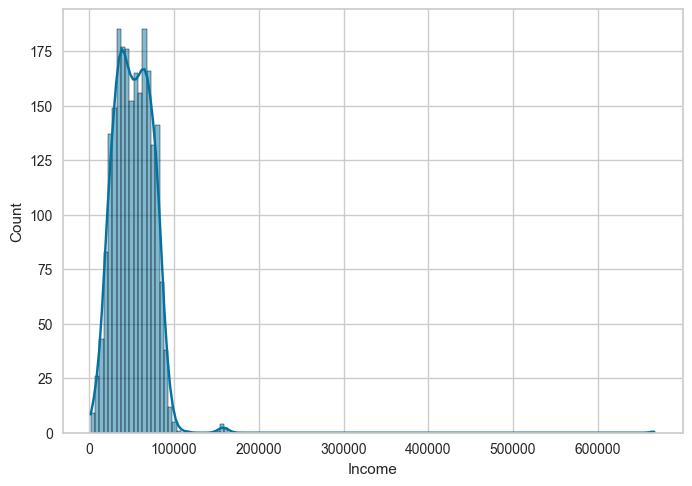

In [99]:
sns.histplot(raw_df[raw_df['Income'].notnull()]['Income'],
             kde=True)

Because **the number of null values in this column is very low** (only 1% compared to the total number of rows), I decide to **delete these rows** to avoid incorrectly replacing values and affecting the distribution of the attribute.

In [100]:
# Removing rows with null values in the 'Income' column
raw_df.dropna(subset=['Income'], inplace=True)

In [101]:
# Check null dataframe after cleaning
value_check_and_sort(raw_df)

,Count,Unique,Null,%Null,DType
ID,2216,2216,0,0.00%,int64
Living_With,2216,23,0,0.00%,object
Total_Purchase,2216,39,0,0.00%,float64
Month_Register,2216,12,0,0.00%,float64
Year_Register,2216,3,0,0.00%,float64
Phone,2216,2216,0,0.00%,float64
Gender,2216,3,0,0.00%,object
Complain,2216,2,0,0.00%,float64
Promo_20,2216,2,0,0.00%,float64
Promo_10,2216,2,0,0.00%,float64


> All cleaned

#### ***3.3 Logical Checking*** <a id="c35"></a>

Although the dataframe is now cleaned from null values, we cannot be certain that no erroneous values have been "secretly" assigned to the dataset. Therefore, I will check the logical consistency of the data columns to ensure correctness before proceeding to the outlier preprocessing stage.

In [102]:
df1 = raw_df.copy()

> First, in the `Academic_Level` column, "Master" and "2n Cycle" have the same meaning, so they will be merged into "Master".

In [103]:
# Grouping values and check
df1['Academic_Level'] = df1['Academic_Level'].replace('2n Cycle', 'Master')
df1['Academic_Level'].value_counts()

Academic_Level
Graduation    1116
Master         565
PhD            481
Basic           54
Name: count, dtype: int64

> Second. In the Living_With column, marital status and number of children are combined, so we will separate them into a column Status for marital status and Children for the number of children.

In [104]:
# Seperating and removing the non-using columns
df1[['Status', 'Children']] = df1['Living_With'].str.split('_', expand=True)
df1.drop(columns=['Living_With'], inplace=True)

> After that, we redefine the "Status" into 5 states: 'Married', 'Together', 'Single' (Single & Alone), 'Divorced', 'Widow'.

In [105]:
# Removing rows with 'Status' as 'YOLO' or 'Absurd'
df1 = df1[~df1['Status'].isin(['YOLO', 'Absurd'])]
# Merging 'Single' and 'Alone' into 'Single'
df1['Status'] = df1['Status'].replace('Alone', 'Single')

In [106]:
df1['Status'].value_counts()

Status
Married     857
Together    573
Single      474
Divorced    232
Widow        76
Name: count, dtype: int64

In [107]:
df1['Children'].value_counts()

Children
1    1115
0     631
2     416
3      50
Name: count, dtype: int64

Lastly, I noticed that in the promotion-related categorical variables, some data rows contain the value "-1" even though the data type of the column is boolean. Therefore, we will check which columns contain this value.

In [108]:
# Check which columns contain the value "-1"
cols_with_strange_value = df1.columns[df1.isin([-1]).any()].tolist()
print(f'Columns containing "-1" value: {cols_with_strange_value}.')

Columns containing "-1" value: ['Promo_40'].


In [109]:
df1['Promo_40'].value_counts()

Promo_40
-1.0    1479
 0.0     670
 1.0      63
Name: count, dtype: int64

And because the number of "-1" values in this column is too high compared to the total number of rows, combined with the fact that when comparing correlation heatmaps, this column does not show strong correlations with any other columns. Therefore, I have decided to drop this column.

In [110]:
# Replace the column with too many strange values
df1.drop(columns=['Promo_40'], inplace=True)

Now the data may seem ready, we're going to visualizing it before doing the Outliers processes.

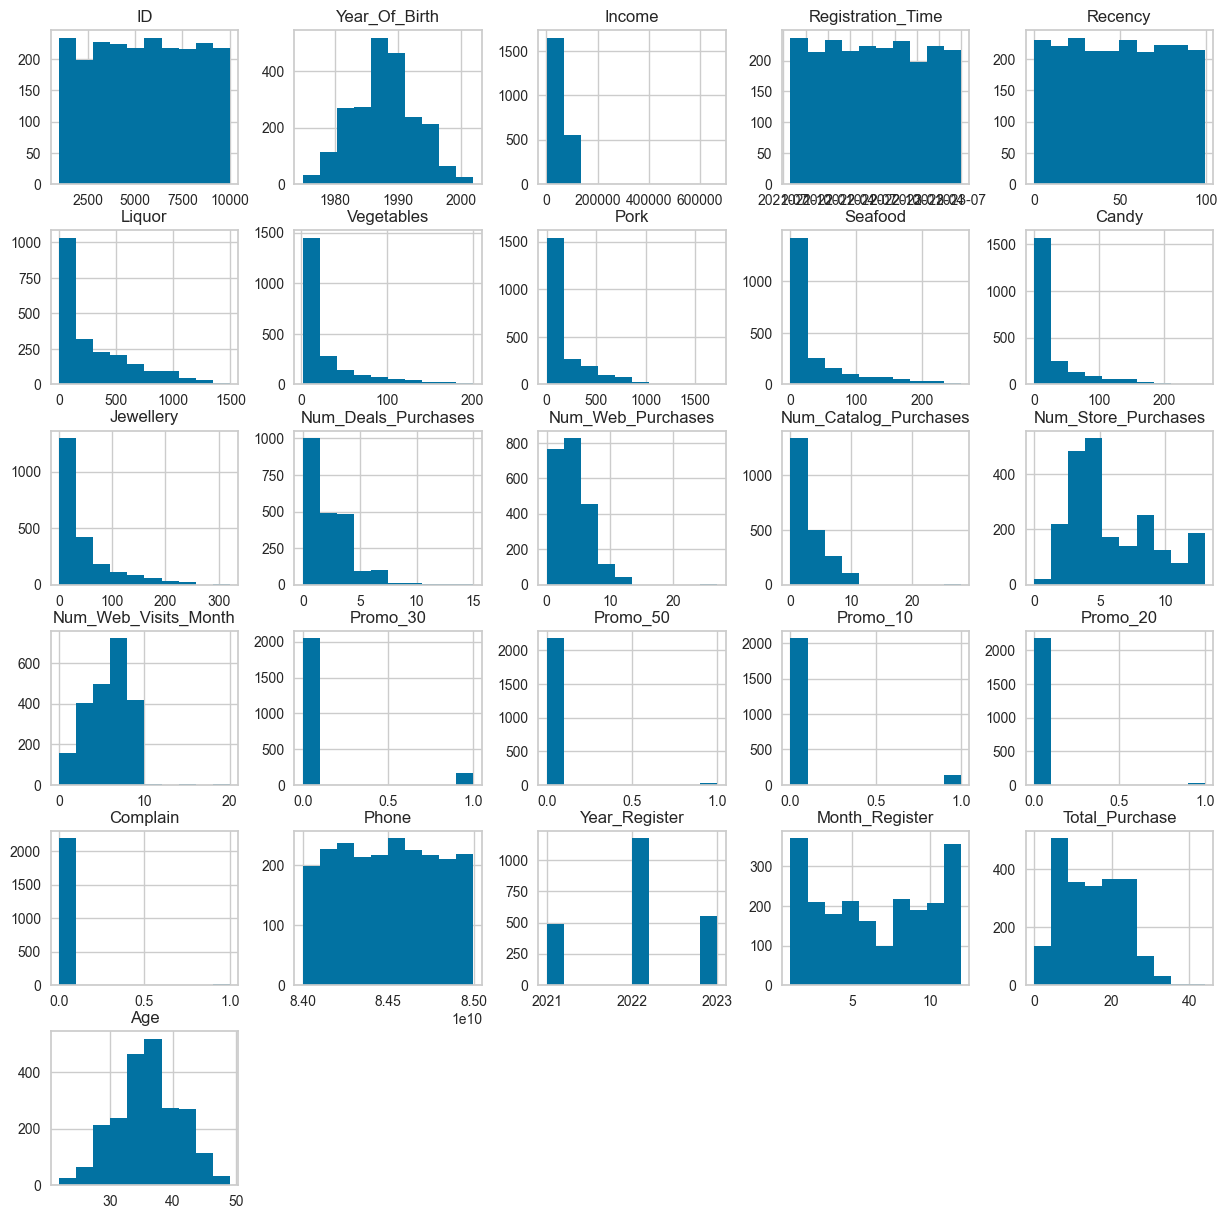

In [111]:
df1.hist(figsize=(15, 15))
plt.show()

#### ***3.4. Outliers removing*** <a id="c34"></a>
In outlier processing, there are typically two main approaches: the **Interquartile Range (IQR) method** and the **3-sigma method**. Each method offers a distinct approach to identifying and handling outliers within a dataset. 

In [112]:
# Copying to another dataframe to make sure we don't over-delete rows 
df2 = df1.copy()
df2.shape

(2212, 31)

In [113]:
# Metadata columns
meta_col_lst = ['ID', 'Year_Of_Birth', 'Phone', 'Year_Register', 'Month_Register']

# Boolean data columns (a type of category)
bl_col_lst = ['Promo_10', 'Promo_20', 'Promo_30', 'Promo_50', 'Complain']

# Remove non-numeric data columns that are in numeric format
new_num_col_lst = list(df2.select_dtypes(include='number').columns)
outliers_chk_col_lst = [col for col in new_num_col_lst if (col not in meta_col_lst and col not in bl_col_lst)]
outliers_chk_col_lst

['Income',
 'Recency',
 'Liquor',
 'Vegetables',
 'Pork',
 'Seafood',
 'Candy',
 'Jewellery',
 'Num_Deals_Purchases',
 'Num_Web_Purchases',
 'Num_Catalog_Purchases',
 'Num_Store_Purchases',
 'Num_Web_Visits_Month',
 'Total_Purchase',
 'Age']

Here, I will use the 3-sigma method.

##### **3-sigma method for removing outliers**:

The 3-sigma method, also known as the three standard deviation rule, identifies outliers by considering data points that lie outside of three standard deviations from the mean.

1. Calculate the mean (μ) and standard deviation (σ) of the dataset.
2. Define the upper and lower bounds for outliers:
   - Upper bound: μ + 3σ
   - Lower bound: μ - 3σ
3. Remove any data points that fall outside of these bounds, as they are considered outliers.


In [114]:
# Calculating limit of all columns in dataframe 
mean_values = df2[outliers_chk_col_lst].mean()
std_values = df2[outliers_chk_col_lst].std(ddof=1)
uplim_values = mean_values + 3 * std_values
lowlim_values = mean_values - 3 * std_values

# Initialize an empty dictionary to store the outliers count for each column
outliers_3s = {}  
for col in outliers_chk_col_lst:
    outliers_3s[col] = len(df2[(df2[col] > uplim_values[col]) | (df2[col] < lowlim_values[col])])

# Show results
for col, count in outliers_3s.items():
    print(f'Col {col}: {count} outliers')

Col Income: 8 outliers
Col Recency: 0 outliers
Col Liquor: 15 outliers
Col Vegetables: 64 outliers
Col Pork: 39 outliers
Col Seafood: 57 outliers
Col Candy: 61 outliers
Col Jewellery: 46 outliers
Col Num_Deals_Purchases: 31 outliers
Col Num_Web_Purchases: 3 outliers
Col Num_Catalog_Purchases: 4 outliers
Col Num_Store_Purchases: 0 outliers
Col Num_Web_Visits_Month: 9 outliers
Col Total_Purchase: 3 outliers
Col Age: 0 outliers


<Axes: >

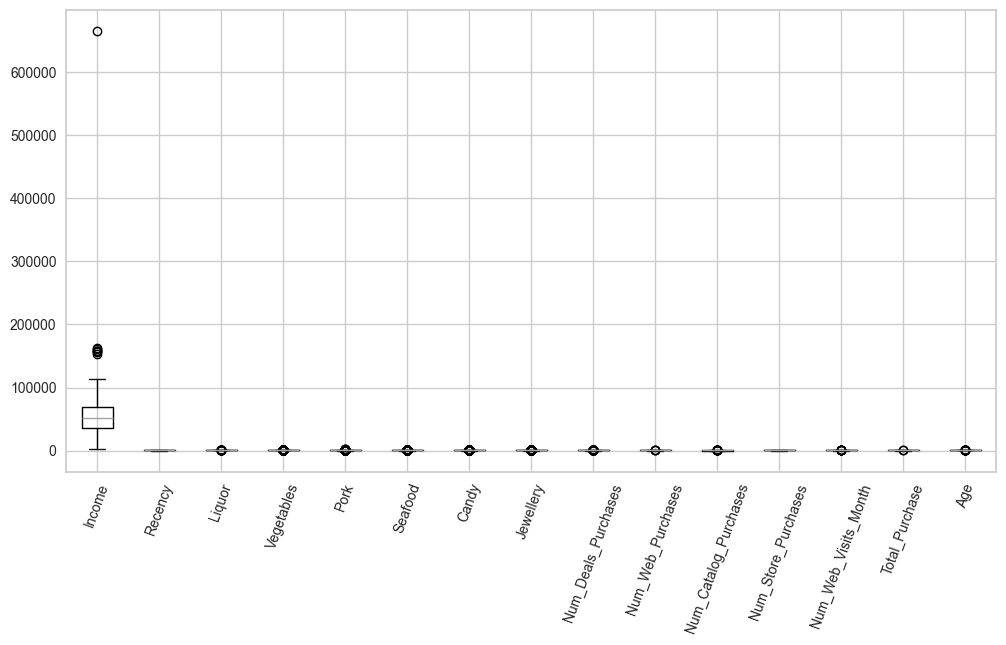

In [115]:
# Visualizing all numeric columns by boxplot
plt.figure(figsize=(12, 6))
df2.boxplot(outliers_chk_col_lst, rot = 70)

In [116]:
# Perform removing outliers
for col in outliers_chk_col_lst:
    mean = df2[col].mean()
    std = df2[col].std(ddof=1)
    uplim = mean + 3 * std
    lowlim = mean - 3 * std
    # values out of 2 limits = OUT!
    outliers_col = df2[col][(df2[col] < lowlim) | (df2[col] > uplim)]
    index_outliers_col = list(outliers_col.index)
    df2.drop(index_outliers_col, axis=0, inplace=True)

<Axes: >

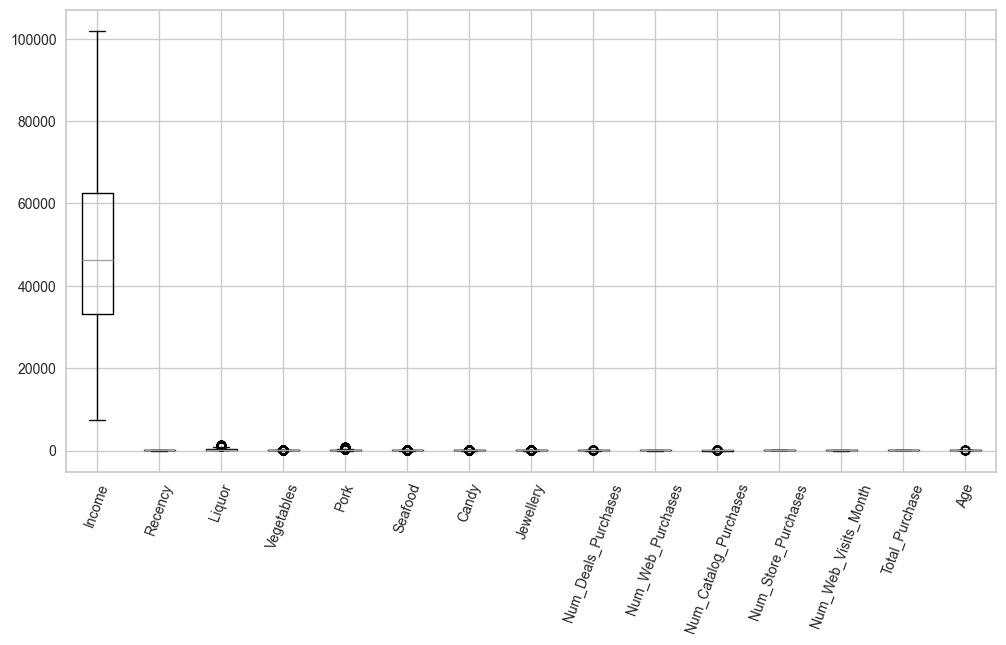

In [117]:
# Visualizing all numeric columns again after removing outliers
plt.figure(figsize=(12, 6))
df2.boxplot(outliers_chk_col_lst, rot = 70)

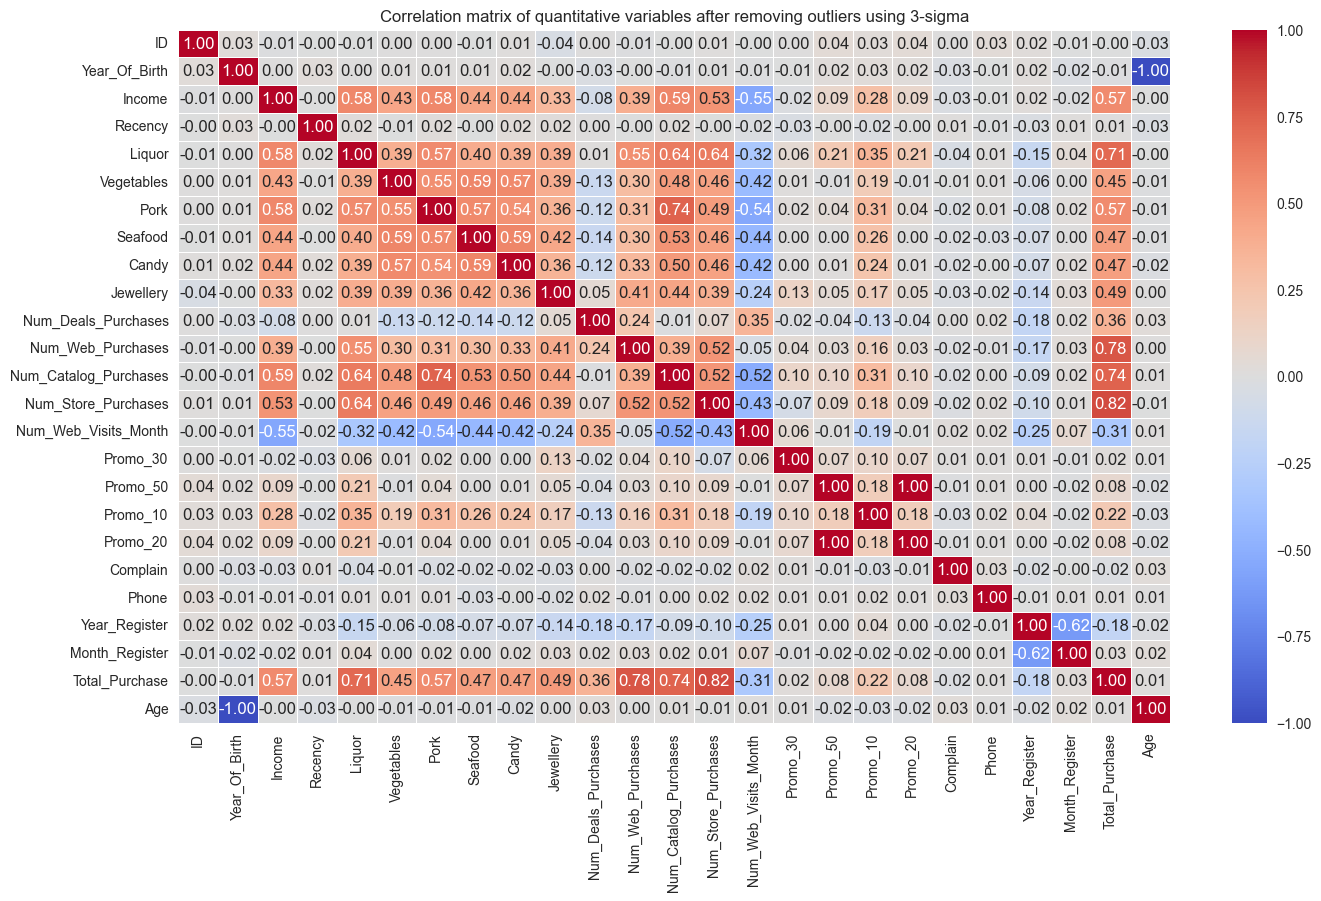

In [118]:
# Check numeric columns after removing outliers using 3-sigma
new_num_col_lst = list(df1.select_dtypes(include='number').columns)
test_numeric_data = df1[new_num_col_lst]

# Perform heatmap to check correlation
correlation_matrix = test_numeric_data.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation matrix of quantitative variables after removing outliers using 3-sigma')
plt.show()

#### ***3.5. Data type Tuning*** <a id="c35"></a>
Converting wrong data type column to proper format.

In [119]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1837 entries, (1001, 831) to (9997, 1054)
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     1837 non-null   int64         
 1   Year_Of_Birth          1837 non-null   float64       
 2   Academic_Level         1837 non-null   object        
 3   Income                 1837 non-null   float64       
 4   Registration_Time      1837 non-null   datetime64[ns]
 5   Recency                1837 non-null   float64       
 6   Liquor                 1837 non-null   float64       
 7   Vegetables             1837 non-null   float64       
 8   Pork                   1837 non-null   float64       
 9   Seafood                1837 non-null   float64       
 10  Candy                  1837 non-null   float64       
 11  Jewellery              1837 non-null   float64       
 12  Num_Deals_Purchases    1837 non-null   float

In [120]:
# Convert datetime column from float to int
dt_col = ['Year_Of_Birth', 'Year_Register', 'Month_Register']
for col in dt_col:
    df2[col] = df2[col].astype(int)

In [121]:
# Convert other integer column to proper format
int_col = ['Recency', 'Num_Deals_Purchases', 'Num_Web_Purchases', 'Num_Catalog_Purchases', 'Num_Store_Purchases', 'Num_Web_Visits_Month', 'Total_Purchase']
for col in int_col:
    df2[col] = df2[col].astype(int)

In [122]:
# Convert other number category column to proper format (object)
number_cate_col = ['Promo_10', 'Promo_20', 'Promo_30', 'Promo_50', 'Complain']
for col in number_cate_col:
    df2[col] = (df2[col].astype(int)).astype(object)

In [123]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1837 entries, (1001, 831) to (9997, 1054)
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     1837 non-null   int64         
 1   Year_Of_Birth          1837 non-null   int32         
 2   Academic_Level         1837 non-null   object        
 3   Income                 1837 non-null   float64       
 4   Registration_Time      1837 non-null   datetime64[ns]
 5   Recency                1837 non-null   int32         
 6   Liquor                 1837 non-null   float64       
 7   Vegetables             1837 non-null   float64       
 8   Pork                   1837 non-null   float64       
 9   Seafood                1837 non-null   float64       
 10  Candy                  1837 non-null   float64       
 11  Jewellery              1837 non-null   float64       
 12  Num_Deals_Purchases    1837 non-null   int32

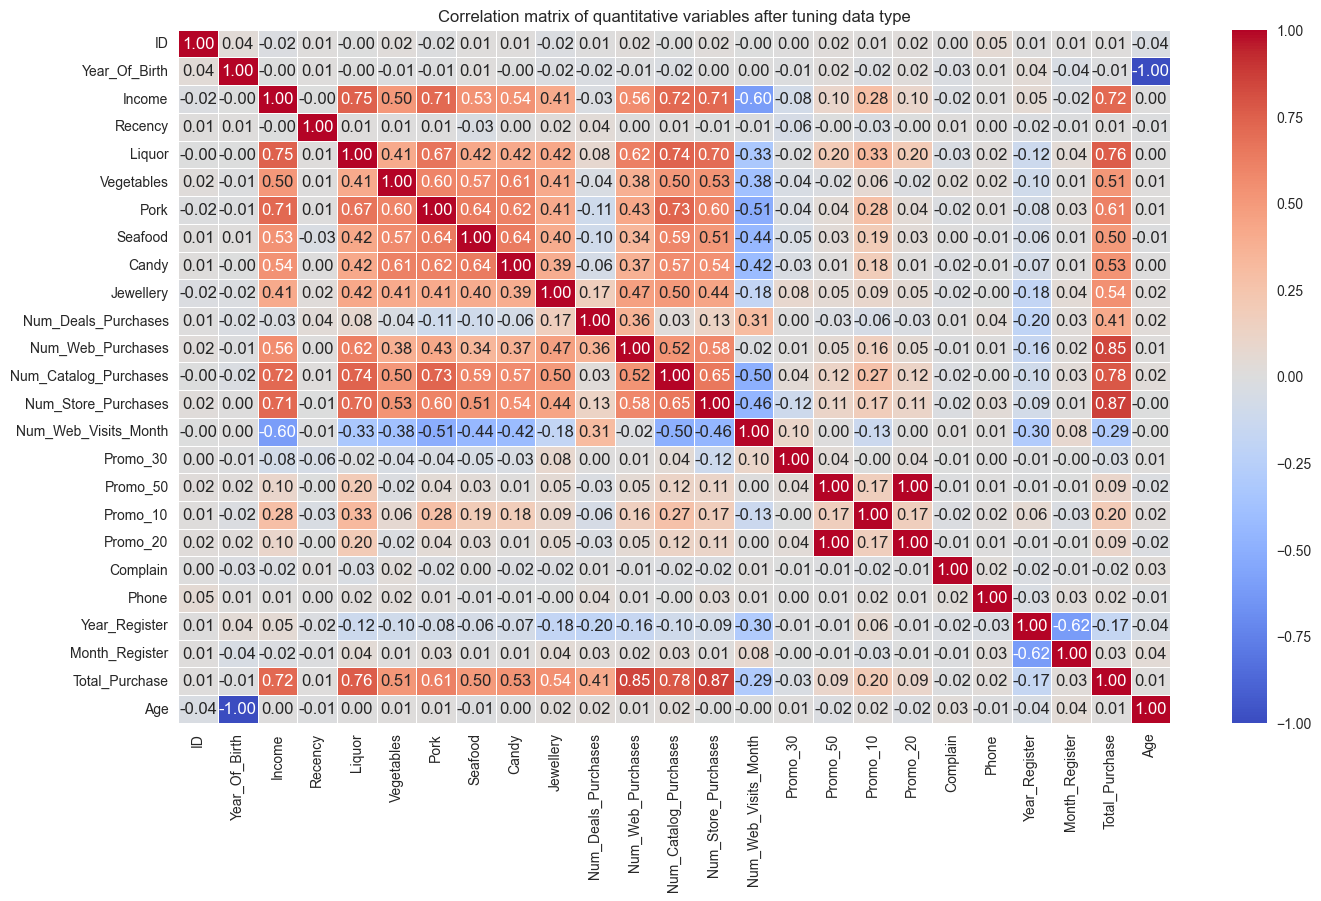

In [124]:
# Check numeric columns after removing outliers using 3-sigma
num_col_lst = list(df2.select_dtypes(include='number').columns)
numeric_df = df2[new_num_col_lst]

# Perform heatmap to check correlation
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation matrix of quantitative variables after tuning data type')
plt.show()

In [125]:
df2.to_csv('cleaning_data.csv', index=False)